In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as sm
from matplotlib import cm
import seaborn as sns

In [2]:
%matplotlib notebook

## How does a Cost/Convex function looks like

<IPython.core.display.Javascript object>


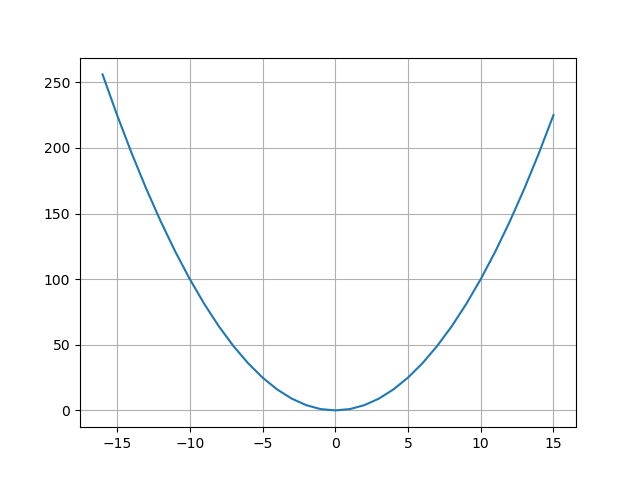

In [3]:
%matplotlib notebook
x = list(range(-16,16))
y = np.square(x)
plt.grid()
plt.plot(x,y)

<IPython.core.display.Javascript object>


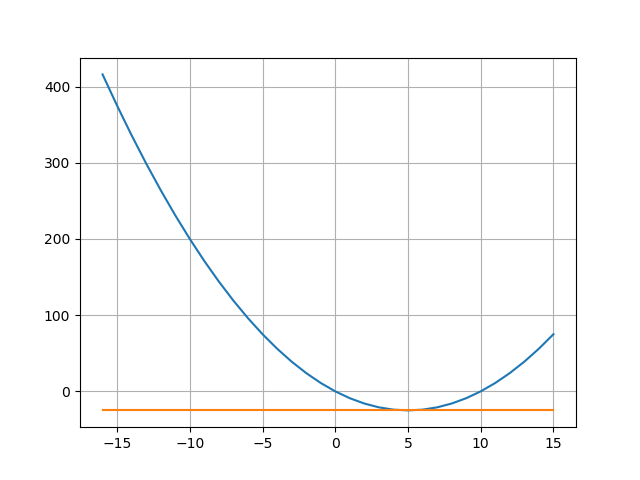

In [5]:
x = list(range(-16,16))
y = np.square(x) - np.multiply(x,10)
plt.grid()
plt.plot(x,y)
y1 = [-25] * len(y)
plt.plot(x,y1)

In [13]:
students_df = pd.read_csv("C:\Anaconda3\Scripts\students.csv")

In [14]:
students_df.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


<IPython.core.display.Javascript object>


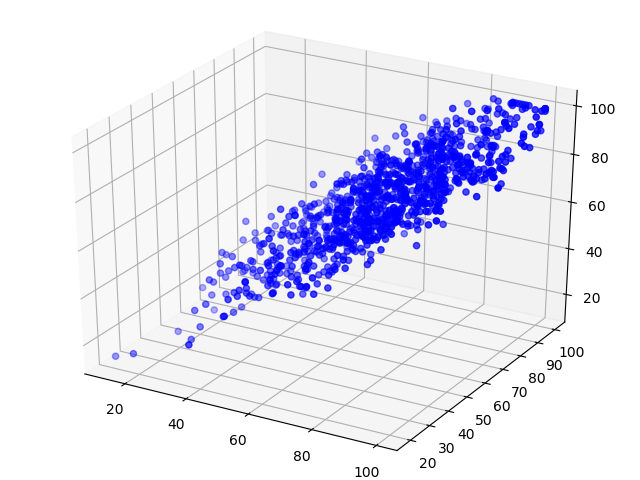

In [16]:
math = students_df['Math']
read = students_df['Reading']
write = students_df['Writing']

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color = 'b')
plt.show()

In [17]:
x = students_df[['Math', 'Reading']]
y = students_df['Writing']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [30]:
alpha = 0.00001 #Step size
iterations = 10000 # No. of iterations
m = y.size # No. of data points
np.random.seed(123) # Set the seed
theta = np.random.rand(3) # Pick some values to start with

In [31]:
theta

array([0.69646919, 0.28613933, 0.22685145])

## Gradient Descent Algorithm

In [32]:
def gradient_descent(x, y, theta, iterations, alpha):
    costs = []
    thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        costs.append(cost)
        gradient = (1/m) * np.dot(x.T, error)
        theta = theta - (alpha * gradient)
        thetas.append(theta)
    return thetas, costs

def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y-Y_pred) ** 2) / len(Y))
    return rmse

def r2_suqare(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_Pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [33]:
x = students_df[['Math', 'Reading']]
y = students_df['Writing']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [34]:
ones = np.ones(x_train.shape[0])
x_train = np.c_[ones, x_train] # Concatenation
x_test = np.c_[np.ones(x_test.shape[0]), x_test]

In [35]:
thetas, costs = gradient_descent(x_train, y_train, theta, iterations, alpha)
theta = thetas[-1] 
print("Final values of theta are : ", theta)

Final values of theta are :  [0.69548757 0.10510298 0.87088648]
